<a href="https://colab.research.google.com/github/mthonorio/calculo-numerico/blob/main/av_4/Atividade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação 04 
### Discente: Matheus Batista Honório
### Matricula: 20190097098



## Questão 1:

Usando os métodos de Euler e Runge-Kutta de $3^{a}$ ordem com
h=0,2 calcule y(1) sabendo que y(x) é solução de $$2x+yy' = y^2, y(0) = 1$$
Sabendo que a solução exata do PVI acima é $y=\sqrt{2x+1}$
calcule para os dois métodos o erro absoluto
cometido na aproximação de y(1).


### Problemas de Valores iniciais (PVI)

$$
    \begin{equation}
      2x+yy' =y^{2}
    \end{equation} \\
    y(0)=1
$$
#### Solução Exata:
$$
    \begin{equation}
      y=\sqrt{2x+1}
    \end{equation}
$$
#### Isolando o y' na equação:
$$ 
y′=\frac{\left(y^2-2x\right)}{y}
$$

In [ ]:
import sympy as sy
import numpy as np
import time as tm
import pandas as pd
import matplotlib.pyplot as plt

$$y_{i+1}=y_{i}+f(x_{i},y_{i})h$$

In [ ]:
def m_euler(xi,xf,f,y0,h):
    
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    fx=np.empty(n)
    fx[0]=y0
    
    for i in range(1,n):
        fx[i]=fx[i-1]+f(x[i-1],fx[i-1])*h   
    return x,fx   

In [ ]:
x,y=sy.symbols('x y')
f=(y**2-2*x)/y
f=sy.lambdify((x,y),f,'numpy')


1.8269481804182377


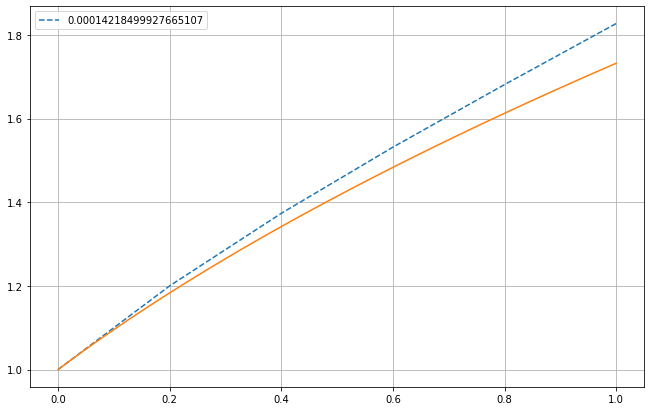

In [ ]:
fig=plt.figure(figsize=(11,7))
plt.grid()
h=[0.2]
tempo=[]
for i in h:
    inicio = tm.perf_counter()
    x,fx=m_euler(0,1,f,1,i)
    fim = tm.perf_counter()
    tempo.append(fim-inicio)
    plt.plot(x,fx,linestyle='--')
tabela={'Tempo':tempo}
x=np.linspace(0,1)
y=(((2*x)+1)**(0.5))
_=plt.plot(x,y)
_=plt.legend(tempo)
print(fx[-1])

#### Método de Runge Kutta de terceira ordem

$$ y_{i+1}=y_{i}+\dfrac{1}{6}(k_{1}+4k_{2}+k_{3})h$$

$$ k_{1}=f(x_{i},y_{i}) $$

$$ k_{2}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{1}h)$$

$$ k_{3}=f(x_{i}+h,y_{i}-k_{1}h+2k_{2}h)$$

In [ ]:
def runge_kutta_3(xi,xf,f,y0,h):
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    k=np.empty(3)
    fx=np.empty(n)
    fx[0]=y0
    for i in range(1,n):
        k[0]=f(x[i-1],fx[i-1])
        k[1]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[0]*h))
        k[2]=f(x[i-1]+h,fx[i-1] + h*(-k[0]+2*k[1]))
        
        fx[i]=fx[i-1] + h*(k[0]+4*k[1]+k[2])/6  
    return x,fx   

[0.  0.2 0.4 0.6 0.8 1. ] [1.         1.18324403 1.34172889 1.48340832 1.61272707 1.73247183]


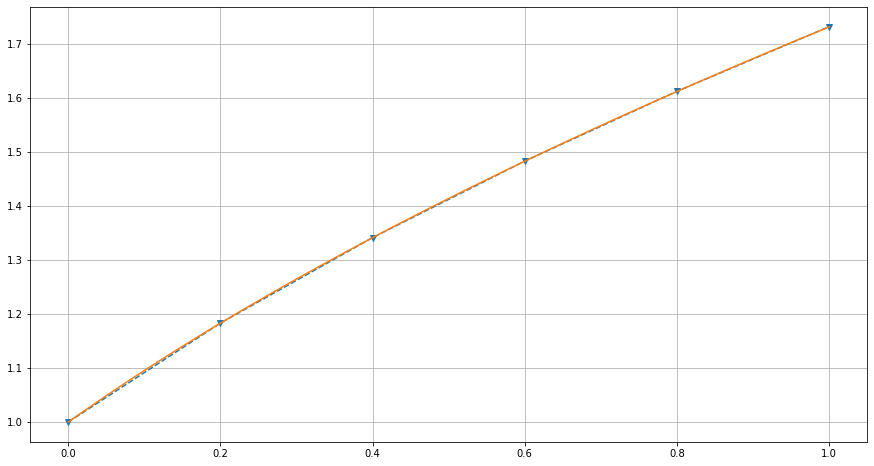

In [ ]:
tempo=[]

x,y=sy.symbols('x y')

f=(y**2-2*x)/y

f=sy.lambdify((x,y),f,'numpy')

fig=plt.figure(figsize=(15,8))

plt.grid()

inicio = tm.perf_counter()
x,fx=runge_kutta_3(0,1,f,1,0.2)
print(x,fx)
fim = tm.perf_counter()
tempo.append(fim-inicio)
_=plt.plot(x,fx,linestyle='--',marker='v')
x=np.linspace(0,1)
y=(((2*x)+1)**(0.5))
_=plt.plot(x,y)

#### Comparando os métodos acima e seus erros absolutos, vale ressaltar que o método de Runge Kutta de terceira ordem foi mais efetivo para questão proposta tendo o menor erro absoluto.

Resultado utilizando o método de Euler: \\
$fx = 1.82694818$, aproximadamente, $1.83$. \\
Erro absoluto de aproximadamente $0.09$.

Resultado utilizando o método de Runge Kutta de $3^a$ ordem: \\
$fx = 1.73247183$, ou aproximadamente, $1.73$. \\
Erro absoluto de aproximadamente $3.4 \cdot 10^{-3}$.

## Questão 2

Seja ***P(t)*** o número de indivíduos de uma certa população
medido em anos. Se a taxa de nascimentos é constante ***b*** e a taxa
de mortalidade ***d*** é proporcional ao tamanho da população, então
o crescimento da população é dado pela equação logística
$$
\frac{dP\left(t\right)}{\:dt}=bP\left(t\right)-k\left(P\left(t\right)\right)^2
$$
Onde $d=kP(t)$. Suponha que $P(0)= 50976, b = 2.9x10^{-2}$ e $k =
1.4x10^{-7}$
. Encontre a população estimada depois de 5 anos
utilizando Runge-Kutta de ordem 4.

#### Substituindo a variável P(t) por y e adicionando os devidos valores:
$$\frac{dy}{\:dt}=by-k\left(y\right)^2$$
$$\frac{dy}{\:dt}=2.9\cdot 10^{-2}\cdot y-1.4\cdot 10^{-7}\cdot \left(y\right)^2$$

#### Método de Runge Kutta de quarta ordem

$$ y_{i+1}=y_{i}+\dfrac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})h$$

$$ k_{1}=f(x_{i},y_{i}) $$

$$ k_{2}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{1}h)$$

$$ k_{3}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{2}h)$$

$$ k_{4}=f(x_{i}+h,y_{i}+k_{3}h)$$

In [ ]:
def runge_kutta_4(xi,xf,f,y0,h):
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    k=np.empty(4)
    fx=np.empty(n)
    fx[0]=y0
    for i in range(1,n):
        k[0]=f(x[i-1],fx[i-1])
        k[1]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[0]*h))
        k[2]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[1]*h))
        k[3]=f(x[i-1]+h,fx[i-1]+(k[2]*h))
        fx[i]=fx[i-1]+np.sum((((1/6)*k[0::3])+((1/3)*(k[1:3])))*h)
    return x,fx   

A previsão da população em 5 anos é de 56751.03676820663


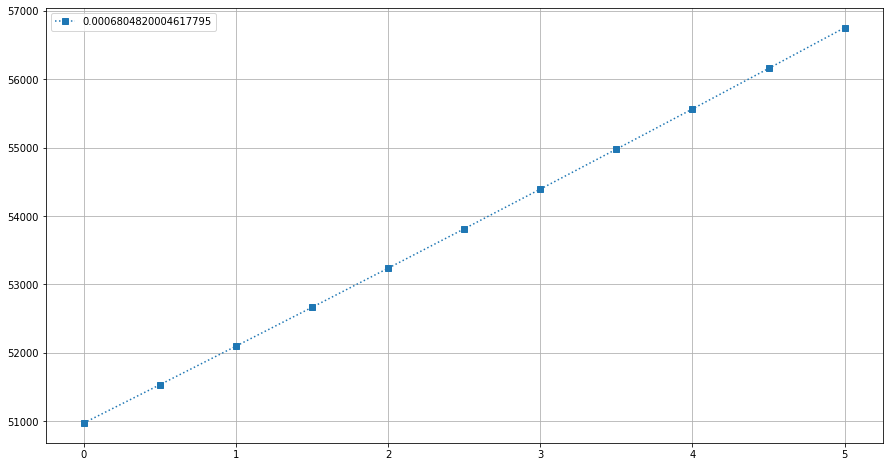

In [ ]:
tempo=[]

x,y=sy.symbols('x y')

f=(2.9*10**-2)*y-(1.4*10**-7)*(y**2)

f=sy.lambdify((x,y),f,'numpy')

fig=plt.figure(figsize=(15,8))

plt.grid()

# Runge Kutta Quarta Ordem
inicio = tm.perf_counter()
x,fx=runge_kutta_4(0,5,f,50976,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
plt.plot(x,fx,linestyle=':',marker='s')
plt.legend(tempo)

x=np.linspace(0,5)
print("A previsão da população em 5 anos é de", fx[-1])

#### A população estimada depois de 5 anos é de aproximadamente $56751$ pessoas.